In [1]:
import argparse
from pathlib import Path
import tensorflow as tf
import cv2
import torch
import yaml
import numpy as np
import torchvision
import time
import os
import glob

In [ ]:
model_path = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\yolov8-seg\privacy-segmentation\yolov8s-finetune-balanced\weights\best_float16.tflite'
# model_path = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\temp\yolov8s-seg_float32.tflite'
interpreter = tf.lite.Interpreter(model_path=model_path)
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
input_shape = input_details[0]['shape']
input_index = input_details[0]['index']
output_shape = output_details[0]['shape']
output_index = output_details[0]['index']

c:\Users\Sai\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [3]:
print("Input shape:", input_shape)
print("Output shape:", output_shape)

Input shape: [  1 640 640   3]
Output shape: [   1  116 8400]


In [4]:
output_details

[{'name': 'Identity',
  'index': 475,
  'shape': array([   1,  116, 8400], dtype=int32),
  'shape_signature': array([   1,  116, 8400], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}},
 {'name': 'Identity_1',
  'index': 429,
  'shape': array([  1, 160, 160,  32], dtype=int32),
  'shape_signature': array([  1, 160, 160,  32], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [14]:
import sys
sys.path.append('../../')
from utils.VisualisationUtils import *

In [10]:
from ultralytics import YOLO
model_path = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\yolov8-seg\privacy-segmentation\yolov8n-640-3e4-mosaic-b16-ndata\weights\best_float32.tflite'
model = YOLO(model_path, task="segment")

Loading C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\yolov8-seg\privacy-segmentation\yolov8n-640-3e4-mosaic-b16-ndata\weights\best_float32.tflite for TensorFlow Lite inference...

image 1/1 C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\test_samples\IMG-20250324-WA0018.jpg: 640x640 1 id_card, 1 screen, 138.8ms


c:\Users\Sai\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


Speed: 2.8ms preprocess, 138.8ms inference, 4.6ms postprocess per image at shape (1, 3, 640, 640)


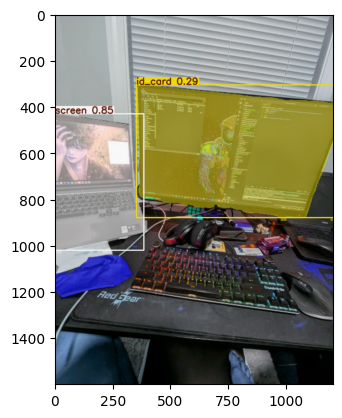

In [11]:
import matplotlib.pyplot as plt
image_path = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\test_samples\IMG-20250324-WA0018.jpg'
result = model.predict(image_path)
res = result[0].plot()
plt.imshow(res)
plt.show()

c:\Users\Sai\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


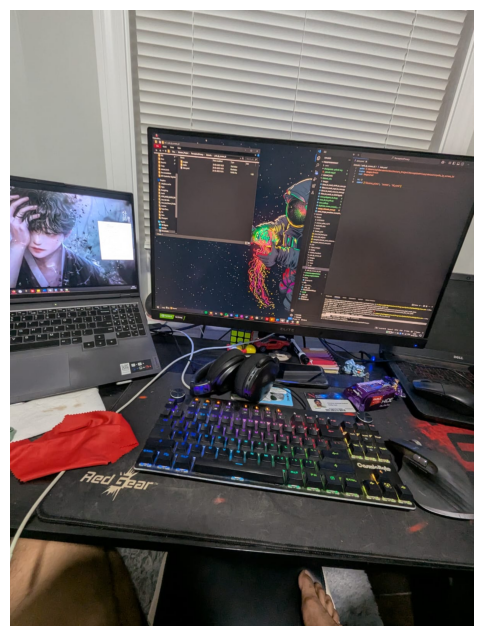

In [26]:
# Path to your TFLite model
model_path = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\yolov8-seg\privacy-segmentation\yolov8s-finetune-balanced\weights\best_float32.tflite'

# Your class names (replace with your actual class names)
class_names = ["license_plate", "id_card", "screen"]

# Initialize the model
model = YOLOv8SegmentationTFLite(model_path, class_names)

# Preprocess an image
image_path = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\test_samples\IMG-20250324-WA0018.jpg'
preprocessed_img = model.preprocess_image(image_path)

# Run inference
detections, proto = model.run_inference(preprocessed_img)

# Process output to get masks
results = model.process_output(detections, proto)

# Overlay masks on original image
result_image = model.overlay_masks(results)

# Display or save the result
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [34]:
import os
import random
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

# === CONFIG ===
val_images_dir = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\datasets\classes'  # CHANGE THIS
val_ann_path = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\datasets\classes\coco_bal_val.json'  # COCO format
model_path = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\yolov8-seg\privacy-segmentation\yolov8s-finetune-balanced\weights\best.pt'
num_samples_per_class = 5

# === Load COCO Annotations ===
with open(val_ann_path, 'r') as f:
    coco = json.load(f)

# Map image_id → file_name
img_id_to_file = {img["id"]: img["file_name"] for img in coco["images"]}

# Map category_id → name
category_id_to_name = {cat["id"]: cat["name"] for cat in coco["categories"]}

# Group image_ids by category
category_to_images = defaultdict(set)
for ann in coco["annotations"]:
    category_to_images[ann["category_id"]].add(ann["image_id"])

# Pick N images per class
selected_images = set()
for cat_id, image_ids in category_to_images.items():
    selected = random.sample(list(image_ids), min(num_samples_per_class, len(image_ids)))
    selected_images.update(selected)

img_files2 = [os.path.join(val_images_dir, img_id_to_file[img_id]) for img_id in selected_images]

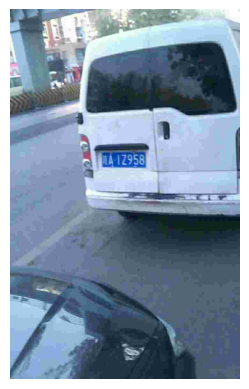

In [35]:
img = cv2.imread(img_files2[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')
plt.show()

In [36]:
samples_dir = r'C:\Users\Sai\Documents\Neu\Masters_Project\PerceptionPrivacy\instance_segmentation\test_samples'
img_files = os.listdir(samples_dir)
img_files = [os.path.join(samples_dir, img) for img in img_files]

In [ ]:
preds = []
imgs = []
for image_path in img_files:
    preprocessed_img = model.preprocess_image(image_path)

    # Run inference
    detections, proto = model.run_inference(preprocessed_img)

    # Process output to get masks
    results = model.process_output(detections, proto)

    # Overlay masks on original image
    result_image = model.overlay_masks(results)
    preds.append(cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB))


In [29]:
detections.shape, proto.shape

((1, 39, 8400), (1, 160, 160, 32))

In [ ]:
show_images(preds, shape=(5, 6), figsize=(35, 35))